# Simulating M/D/1 queues

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 1000
ARRIVAL_RATE = 1
EXECUTION_RATE = 1

## An example arrival time distribution

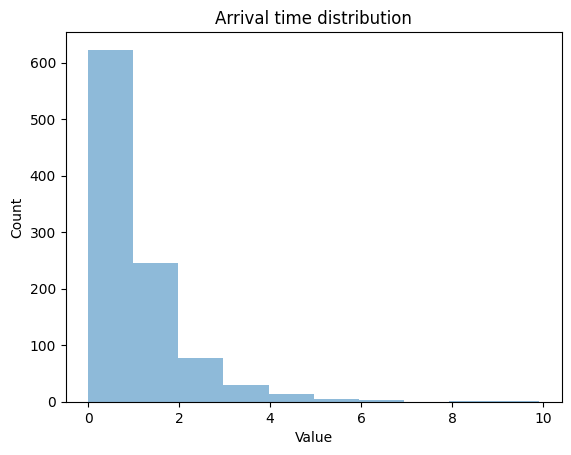

Mean arrival time: 1.0272727282722929
[0.40751609 2.89142021 0.40499146 0.03103178 1.29337102 1.49808059
 0.21574273 0.29402054 0.31342699 0.0940345 ]


In [8]:
inter_arrival_time = np.random.exponential(scale=1,size=SAMPLE_SIZE)

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')
print(inter_arrival_time[:10])

## Queue length over time

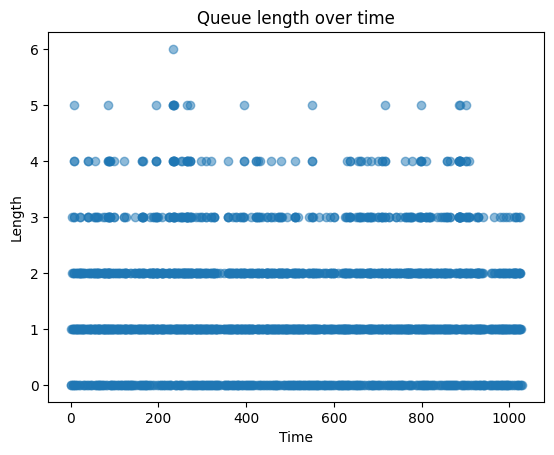

Mean queue length: 252.45911645492197


In [9]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE), executors=4)
queue.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue.length), alpha=0.5)
plt.show()

print(f'Mean queue length: {queue.length.mean()}')


## Departure time and distribution

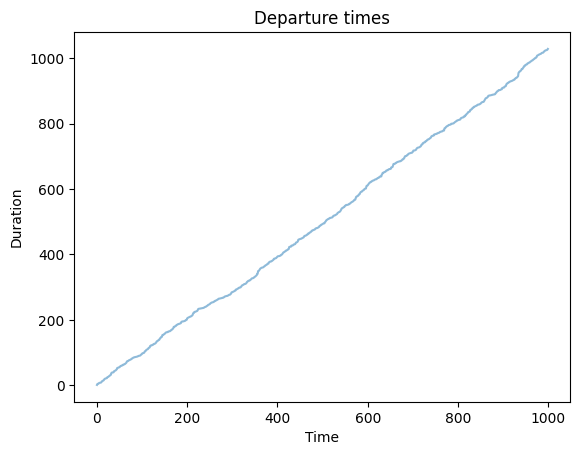

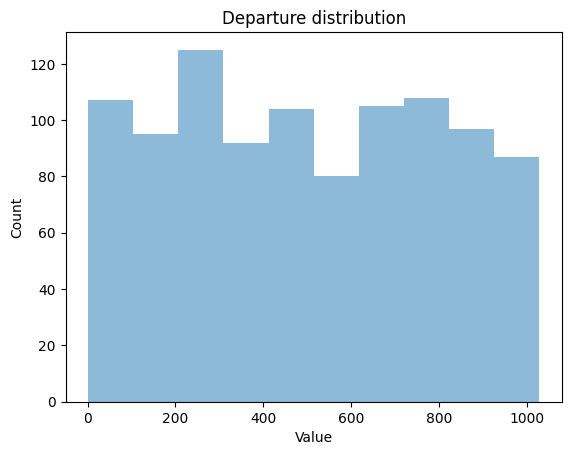

In [10]:
plt.title("Departure times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

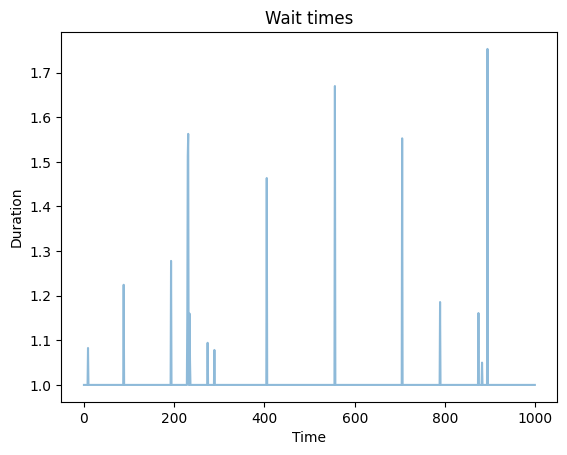

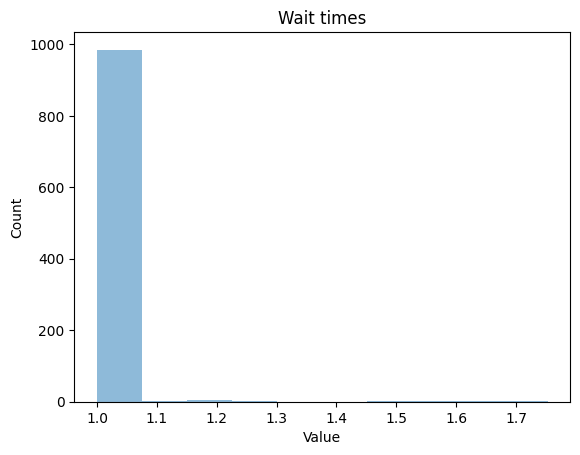

In [11]:
plt.title("Wait times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()

# Utilization

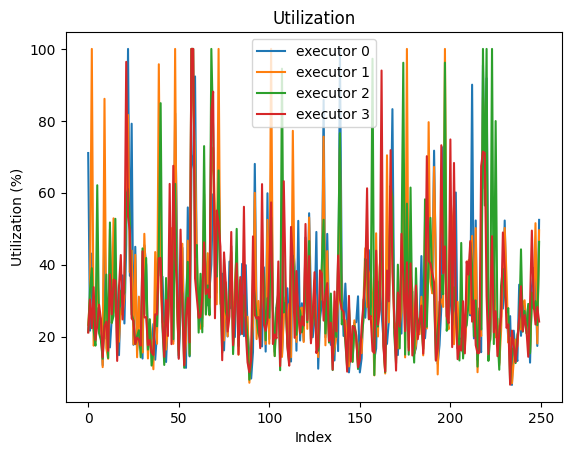

In [12]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
# plot lines 
plt.plot(queue.utilization(0) * 100, label = "executor 0") 
plt.plot(queue.utilization(1) * 100, label = "executor 1") 
plt.plot(queue.utilization(2) * 100, label = "executor 2") 
plt.plot(queue.utilization(3) * 100, label = "executor 3") 
plt.legend() 
plt.show()